Aria
D-LinkCam
D-LinkDayCam
D-LinkDoorSensor
D-LinkHomeHub
D-LinkSensor
D-LinkSiren
D-LinkSwitch
D-LinkWaterSensor
EdimaxCam
EdimaxPlug1101W
EdimaxPlug2101W
EdnetCam
EdnetGateway
HomeMaticPlug
HueBridge
HueSwitch
iKettle2
Lightify
MAXGateway
SmarterCoffee
TP-LinkPlugHS100
TP-LinkPlugHS110
WeMoInsightSwitch
WeMoLink
WeMoSwitch


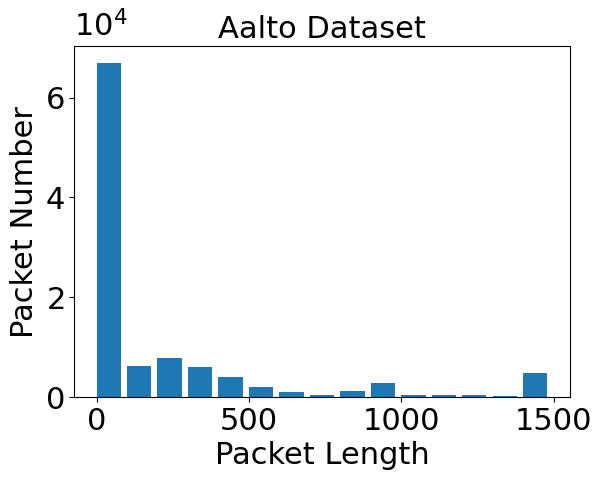

In [1]:
from scapy.all import*
from scapy.layers.l2 import Ether
from scapy.layers.inet import IP
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from scapy.utils import PcapReader


def read_pcap(path):
    packets = PcapReader(str(path))
    return packets

files_add = ['captures_IoT_Sentinel\\Aria\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\Aria\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-B-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-B-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-B-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-B-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-B-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\D-LinkCam\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDayCam\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-16-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-17-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-18-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-19-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-20-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\D-LinkDoorSensor\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\D-LinkHomeHub\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-B-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-B-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-B-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-B-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-B-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSensor\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-16-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-17-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-18-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-19-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSiren\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\D-LinkSwitch\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-16-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-17-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-18-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-19-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\D-LinkWaterSensor\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam1\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam1\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam1\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam1\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam1\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam1\\Setup-A-6-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam1\\Setup-A-7-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam1\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam1\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam1\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam1\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam1\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam2\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam2\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam2\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam2\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam2\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam2\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam2\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\EdimaxCam2\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug1101W\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\EdimaxPlug2101W\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam1\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam1\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam1\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam1\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam1\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam1\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam1\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam1\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam1\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam1\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam1\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam2\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam2\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam2\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam2\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam2\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam2\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam2\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam2\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\EdnetCam2\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-16-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-17-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-18-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\EdnetGateway\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-16-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-17-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-18-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-19-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-20-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\HomeMaticPlug\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\HueBridge\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-A-10-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-A-6-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-A-7-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-A-8-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-A-9-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\HueSwitch\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-10-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-11-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-12-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-13-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-14-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-15-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-6-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-7-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-8-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-A-9-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\iKettle2\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-16-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-17-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-18-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-19-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-20-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\Lightify\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-A-6-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-A-7-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-A-8-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-A-9-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\MAXGateway\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-10-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-11-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-12-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-13-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-14-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-15-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-6-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-7-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-8-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-A-9-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\SmarterCoffee\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS100\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-A-10-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-A-6-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-A-7-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-A-8-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-A-9-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\TP-LinkPlugHS110\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-A-10-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-A-11-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-A-6-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-A-7-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-A-8-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-A-9-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch2\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch2\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch2\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch2\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\WeMoInsightSwitch2\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-10-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-11-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-12-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-13-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-14-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-15-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-6-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-7-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-8-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-A-9-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\WeMoLink\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-A-10-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-A-2-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-A-3-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-A-4-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-A-5-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-A-6-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-A-7-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-A-8-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-A-9-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch\\Setup-C-9-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch2\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch2\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch2\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch2\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\WeMoSwitch2\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-A-1-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-1-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-10-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-11-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-12-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-13-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-14-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-15-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-16-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-17-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-18-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-19-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-2-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-3-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-4-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-5-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-6-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-7-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-8-STA.pcap', 'captures_IoT_Sentinel\\Withings\\Setup-C-9-STA.pcap']

dic = {
 '00:17:88:24:76:ff': 'Hue-Device',
 '00:1a:22:03:cb:be': 'MAXGateway',
 '00:1a:22:05:c4:2e': 'HomeMaticPlug',
 '00:24:e4:24:80:2a': 'Withings',
 '1c:5f:2b:aa:fd:4e': 'D-LinkDoorSensor',
 '20:f8:5e:ca:91:52': 'Aria',
 '50:c7:bf:00:c7:03': 'TP-LinkPlugHS110',
 '50:c7:bf:00:fc:a3': 'TP-LinkPlugHS100',
 '3c:49:37:03:17:db': 'EdnetCam',
 '3c:49:37:03:17:f0': 'EdnetCam',
 '5c:cf:7f:06:d9:02': 'iKettle2',
 '5c:cf:7f:07:ae:fb': 'SmarterCoffee',
 '6c:72:20:c5:17:5a': 'D-LinkWaterSensor',
 '74:da:38:23:22:7b': 'EdimaxPlug2101W',
 '74:da:38:4a:76:49': 'EdimaxPlug1101W',
 '74:da:38:80:79:fc': 'EdimaxCam',
 '74:da:38:80:7a:08': 'EdimaxCam',
 '84:18:26:7b:5f:6b': 'Lightify',
 '90:8d:78:a8:e1:43': 'D-LinkSensor',
 '90:8d:78:a9:3d:6f': 'D-LinkSwitch',
 '90:8d:78:dd:0d:60': 'D-LinkSiren',
 '94:10:3e:34:0c:b5': 'WeMoSwitch',
 '94:10:3e:35:01:c1': 'WeMoSwitch',
 '94:10:3e:41:c2:05': 'WeMoInsightSwitch',
 '94:10:3e:42:80:69': 'WeMoInsightSwitch',
 '94:10:3e:cd:37:65': 'WeMoLink',
 'ac:cf:23:62:3c:6e': 'EdnetGateway',
 'b0:c5:54:1c:71:85': 'D-LinkDayCam',
 'b0:c5:54:25:5b:0e': 'D-LinkCam'
}
mac_arr = ['00:17:88:24:76:ff', '00:1a:22:03:cb:be', '00:1a:22:05:c4:2e', '00:24:e4:24:80:2a', '1c:5f:2b:aa:fd:4e', '20:f8:5e:ca:91:52', '50:c7:bf:00:c7:03', '50:c7:bf:00:fc:a3', '3c:49:37:03:17:db', '3c:49:37:03:17:f0', '5c:cf:7f:06:d9:02', '5c:cf:7f:07:ae:fb', '6c:72:20:c5:17:5a', '74:da:38:23:22:7b', '74:da:38:4a:76:49', '74:da:38:80:79:fc', '74:da:38:80:7a:08', '84:18:26:7b:5f:6b', '90:8d:78:a8:e1:43', '90:8d:78:a9:3d:6f', '90:8d:78:dd:0d:60', '94:10:3e:34:0c:b5', '94:10:3e:35:01:c1', '94:10:3e:41:c2:05', '94:10:3e:42:80:69', '94:10:3e:cd:37:65', 'ac:cf:23:62:3c:6e', 'b0:c5:54:1c:71:85', 'b0:c5:54:25:5b:0e']
Folder= {'Aria': 'Aria', 'D-LinkCam': 'D-LinkCam', 'D-LinkDayCam': 'D-LinkDayCam', 'D-LinkDoorSensor': 'D-LinkDoorSensor', 'D-LinkHomeHub': 'D-LinkHomeHub', 'D-LinkSensor': 'D-LinkSensor', 'D-LinkSiren': 'D-LinkSiren', 'D-LinkSwitch': 'D-LinkSwitch', 'D-LinkWaterSensor': 'D-LinkWaterSensor', 'EdimaxCam1': 'EdimaxCam', 'EdimaxCam2': 'EdimaxCam', 'EdimaxPlug1101W': 'EdimaxPlug1101W', 'EdimaxPlug2101W': 'EdimaxPlug2101W', 'EdnetCam1': 'EdnetCam', 'EdnetCam2': 'EdnetCam', 'EdnetGateway': 'EdnetGateway', 'HomeMaticPlug': 'HomeMaticPlug', 'HueBridge': 'HueBridge', 'HueSwitch': 'HueSwitch', 'iKettle2': 'iKettle2', 'Lightify': 'Lightify', 'MAXGateway': 'MAXGateway', 'SmarterCoffee': 'SmarterCoffee', 'TP-LinkPlugHS100': 'TP-LinkPlugHS100', 'TP-LinkPlugHS110': 'TP-LinkPlugHS110', 'WeMoInsightSwitch': 'WeMoInsightSwitch', 'WeMoInsightSwitch2': 'WeMoInsightSwitch', 'WeMoLink': 'WeMoLink', 'WeMoSwitch': 'WeMoSwitch', 'WeMoSwitch2': 'WeMoSwitch', 'Withings': 'Withings'}
pre_dev = "Aria"
pck_lengths = []
for pcap in files_add:
    filename = str(pcap)
    filename = filename.replace("\\", "/")
    filename = filename.split("/")
    dev = Folder[filename[1]]
    if pre_dev != dev:
        print(pre_dev)
        pre_dev = dev
    for pck in read_pcap(pcap):
        if pck.src in mac_arr:
            if pck.haslayer(ARP):
                continue
            if pck.haslayer(DHCP):
                continue
            try:
                pck_lengths.append(pck.len)
            except Exception as e:
                continue
arr = np.array(pck_lengths)



bin_edges = np.arange(0, max(arr) + 100, 100)
hist, _ = np.histogram(arr, bins=bin_edges)
plt.bar(bin_edges[:-1], hist, width=80, align='edge')
plt.title('Aalto Dataset', fontsize=22)
plt.xlabel('Packet Length', fontsize=22)
plt.ylabel('Packet Number', fontsize=22)
plt.tick_params(axis='x', labelsize=22)  
plt.tick_params(axis='y', labelsize=22) 
class NoMultiplyScalarFormatter(ScalarFormatter):
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = 0
    def get_offset(self):
        return r'$10^{%d}$' % self.orderOfMagnitude if self.orderOfMagnitude else ''
formatter = NoMultiplyScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.get_offset_text().set_fontsize(22)
plt.gca().yaxis.get_offset_text().set_position((0,1))
plt.gca().yaxis.get_offset_text().set_verticalalignment('bottom')
plt.gca().yaxis.get_offset_text().set_size(22)
plt.subplots_adjust(bottom=0.15)
plt.savefig('pck_lengths.png')
plt.show()